In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


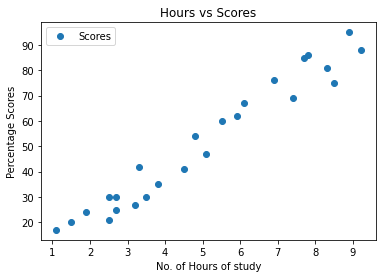

In [7]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('No. of Hours of study')
plt.ylabel('Percentage Scores')
plt.show()

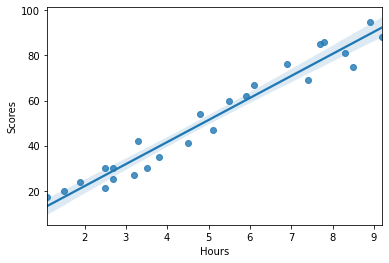

In [8]:
import seaborn as sns
sns.regplot(x='Hours',y='Scores',data=data)

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

X_matrix = X.reshape(1,-1)
X_matrix.shape



(1, 25)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
print(X_test)
y_pred =lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
from sklearn.metrics import mean_squared_error

r2_score =lr.score(X_train,y_train)
print(r2_score)

0.9515510725211552


In [17]:
hours =[[9]]
own_pred = lr.predict(hours)
print(f"if you study for {hours} hours your marks will be",own_pred)

if you study for [[9]] hours your marks will be [91.21406837]


In [17]:
pickle.dump(lr,open('model.pkl','wb'))

In [18]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[9.25]]))

[93.69173249]
